<a href="https://colab.research.google.com/github/KhaiNghiTranNguyen/AI---ANN/blob/main/ANN_Vietnamese_Banknotes_%26_Foods_Regconition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

data_dir = "/content/sample_data/vietnamese-currency/dataset"
img_size = 64

X = []
y = []

# Đọc ảnh
for label in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label)
    if os.path.isdir(label_path):
        for img_file in os.listdir(label_path):
            img_path = os.path.join(label_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (img_size, img_size))
                img = img.astype('float32') / 255.0
                X.append(img)
                y.append(label)

X = np.array(X)
y = np.array(y)

print("Total image:", len(X))
print("Total label:", set(y))

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)
num_classes = y_categorical.shape[1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42)


Total image: 2712
Total label: {np.str_('200000'), np.str_('010000'), np.str_('001000'), np.str_('020000'), np.str_('050000'), np.str_('500000'), np.str_('100000'), np.str_('000500'), np.str_('002000'), np.str_('000200'), np.str_('000000'), np.str_('005000')}


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(img_size, img_size, 3)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     3,145,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,180,428 (12.13 MB)

 Trainable params: 3,180,428 (12.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9152 - loss: 0.2461 - val_accuracy: 0.6924 - val_loss: 0.9638
Epoch 2/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9576 - loss: 0.1292 - val_accuracy: 0.7661 - val_loss: 0.7780
Epoch 3/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9846 - loss: 0.0768 - val_accuracy: 0.7219 - val_loss: 0.9632
Epoch 4/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9650 - loss: 0.1187 - val_accuracy: 0.7366 - val_loss: 0.9361
Epoch 5/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.9698 - loss: 0.0925 - val_accuracy: 0.7477 - val_loss: 0.8972
Epoch 6/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9553 - loss: 0.1419 - val_accuracy: 0.7293 - val_loss: 1.1363
Epoch 7/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8952 - loss: 0.2859 - val_accuracy: 0.7403 - val_loss: 0.8813
Epoch 8/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9441 - loss: 0.1589 - val_accuracy: 0.6796 - v

In [ ]:
accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy[1])

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8070 - loss: 0.9094
Test accuracy: 0.8066298365592957


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Tiên đoán là: 001000


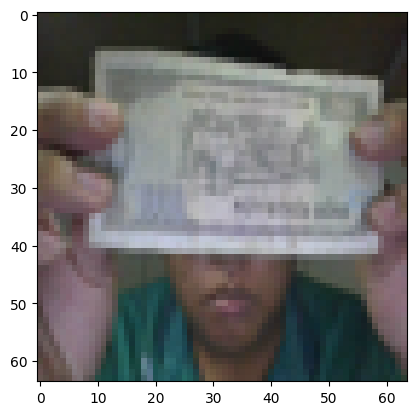

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img = Image.open('/content/sample_data/001000_0.png').resize((64, 64))
plt.imshow(img)
img_array = np.array(img)
img_array = img_array.astype('float32') / 255.0
img_array = img_array.reshape(1, 64, 64, 3) # Reshape to match model input shape (64, 64, 3)

prediction = model.predict(img_array)

predicted_class_index = np.argmax(prediction)
flower_name = le.inverse_transform([predicted_class_index])
print("Tiên đoán là:", flower_name[0])

In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


data_dir = "/content/vietnamese-foods-dataset/dataset"
img_size = 64

X = []
y = []


for label in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label)
    if os.path.isdir(label_path):
        for img_file in os.listdir(label_path):
            img_path = os.path.join(label_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (img_size, img_size))
                img = img.astype('float32') / 255.0
                X.append(img)
                y.append(label)

X = np.array(X)
y = np.array(y)

print("Total image:", len(X))
print("Total label:", set(y))


le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)
num_classes = y_categorical.shape[1]


X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42)


Total image: 2865
Total label: {np.str_('banh_mi'), np.str_('banh_xeo'), np.str_('banh_tieu'), np.str_('banh_da_lon'), np.str_('banh_bo'), np.str_('banh_trung_thu'), np.str_('banh_cong'), np.str_('banh_khot'), np.str_('banh_tai_heo'), np.str_('banh_bot_loc')}


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(img_size, img_size, 3)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │     3,145,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,180,170 (12.13 MB)

 Trainable params: 3,180,170 (12.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=35,
                    validation_data=(X_test, y_test))

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.9843 - loss: 0.0724 - val_accuracy: 0.3316 - val_loss: 4.1351
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9846 - loss: 0.0528 - val_accuracy: 0.3194 - val_loss: 4.3779
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.9876 - loss: 0.0564 - val_accuracy: 0.3019 - val_loss: 4.3063
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9892 - loss: 0.0648 - val_accuracy: 0.3072 - val_loss: 4.7152
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9525 - loss: 0.1600 - val_accuracy: 0.2827 - val_loss: 4.8186
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9039 - loss: 0.2859 - val_accuracy: 0.3089 - val_loss: 4.5190
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.8856 - loss: 0.3519 - val_accuracy: 0.2600 - val_loss: 5.1337
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.8498 - loss: 0.5002 - val_accuracy: 0.2932 - v

In [ ]:
accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy[1])

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3536 - loss: 5.0914
Test accuracy: 0.3333333432674408


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Tiên đoán là: banh_da_lon


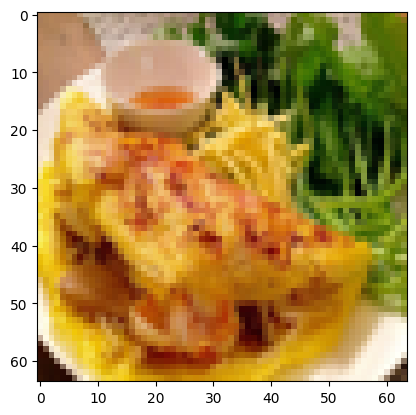

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img = Image.open('/content/sample_data/1.jpg').resize((64, 64))
plt.imshow(img)
img_array = np.array(img)
img_array = img_array.astype('float32') / 255.0
img_array = img_array.reshape(1, 64, 64, 3) # Reshape to match model input shape (64, 64, 3)

# Get prediction from the model
prediction = model.predict(img_array)

predicted_class_index = np.argmax(prediction)
flower_name = le.inverse_transform([predicted_class_index])
print("Tiên đoán là:", flower_name[0])